# **1. Importing Necessary Libraries and Dataset:**

• Load required Python libraries:

o Pandas for handling datasets.

o Scikit-learn for machine learning algorithms and vectorization.

o Matplotlib/Seaborn for data visualization.

o WordCloud for visualizing common words in reviews.

o Warnings to suppress unnecessary messages.

• Load the dataset using Pandas and explore its structure.

In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')  # Suppresses unnecessary warnings

In [2]:
# Load the dataset
df = pd.read_csv('flipkart_data.csv')

In [3]:
# Display the first few rows
df.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [6]:
df.shape

(9976, 2)

# **2: Data Preprocessing**

**• Remove missing values and duplicate entries.**

In [4]:
# Check for missing values
df.isnull().sum()

,0
review,0
rating,0


In [5]:
# Drop missing values
df.dropna(inplace=True)

In [7]:

# Remove duplicates
df.drop_duplicates(inplace=True)

**Convert text into lowercase and remove stopwords, punctuation, and
special characters**

In [8]:
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [9]:
# Clean the review text
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(f'[{string.punctuation}]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text.strip()

In [10]:
# Apply cleaning
df['review'] = df['review'].apply(clean_text)

In [19]:
# Create a sentiment column based on rating
df['sentiment'] = df['rating'].apply(lambda x: 1 if x >= 3 else 0)

# Encode sentiment labels (this step is now redundant as we created the column directly)
# df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Display the first few rows with the new sentiment column
display(df.head())

,review,rating,sentiment
0,it was nice produt i like its design a lot its...,5,1
1,awesome soundvery pretty to see this nd the so...,5,1
2,awesome sound quality pros hrs of battery life...,4,1
3,i think it is such a good product not only as ...,5,1
4,awesome bass sound quality very good bettary l...,5,1


In [20]:
df['sentiment'].value_counts()

,count
sentiment,
1,6957
0,911


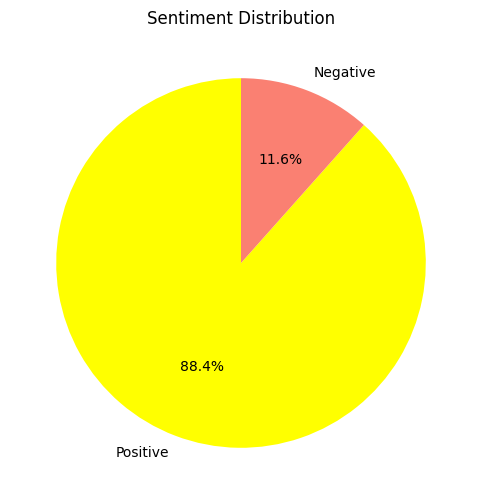

In [23]:
# Visualize the sentiment distribution using a pie chart
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=['Positive', 'Negative'], autopct='%1.1f%%', startangle=90, colors=['yellow', 'salmon'])
plt.title('Sentiment Distribution')
plt.show()

In [24]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(df['review']).toarray()
y = df['sentiment']

In [25]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# **3. Exploratory Data Analysis (EDA):**

**Visualize sentiment distribution using count plots.**

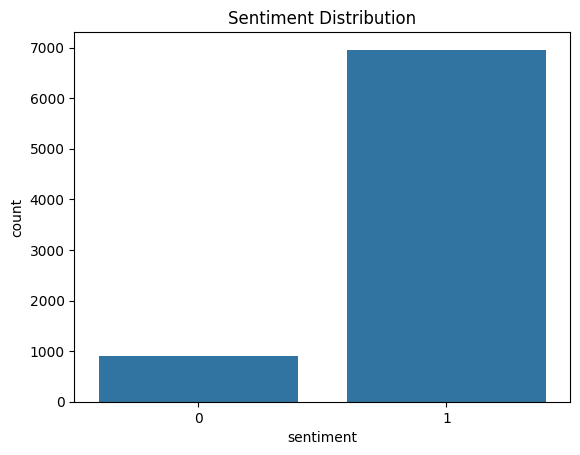

In [28]:
# Sentiment distribution
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

**• Create a word cloud to identify common words in positive and negative
reviews.**

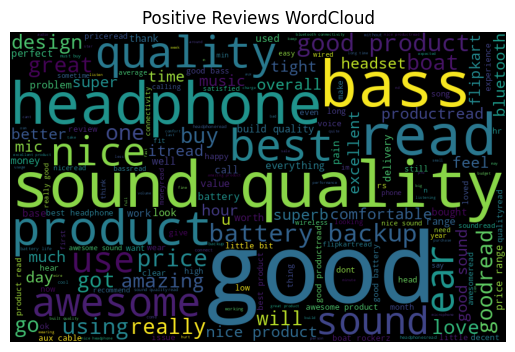

In [34]:
# WordCloud for positive reviews
pos_text = ' '.join(df[df['sentiment'] == 1]['review'])
wordcloud_pos = WordCloud(width=800, height=500).generate(pos_text)
plt.imshow(wordcloud_pos)
plt.axis('off')
plt.title('Positive Reviews WordCloud')
plt.show()

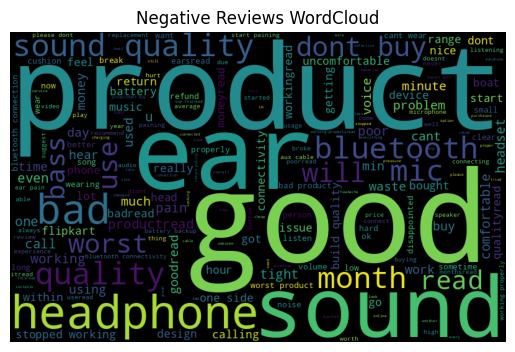

In [38]:
# WordCloud for negative reviews
neg_text = ' '.join(df[df['sentiment'] == 0]['review'])
wordcloud_neg = WordCloud(width=800, height=500).generate(neg_text)
plt.imshow(wordcloud_neg)
plt.axis('off')
plt.title('Negative Reviews WordCloud')
plt.show()

**• Analyze correlations between review length and sentiment.**

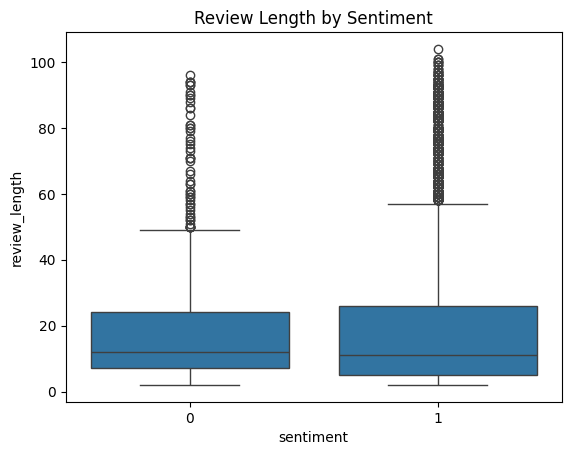

In [55]:
# Review length vs sentiment
df['review_length'] = df['review'].apply(lambda x: len(x.split()))
sns.boxplot(x='sentiment', y='review_length', data=df)
plt.title('Review Length by Sentiment')
plt.show()

 Explanation:
Visualizes sentiment distribution.

Word clouds highlight frequent words in each sentiment.

Boxplot shows review length correlation with sentiment.

# **4. Model Training and Selection:**

• Train different machine learning models:  

o Logistic Regression

o Naïve Bayes

o Random Forest Classifier

o Support Vector Machine (SVM)



• Compare model performance using accuracy and F1-score.



In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'SVM': SVC(class_weight='balanced')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'{name} - Accuracy: {acc:.4f}, F1 Score: {f1:.4f}')


Logistic Regression - Accuracy: 0.9104, F1 Score: 0.9516
Naive Bayes - Accuracy: 0.8882, F1 Score: 0.9407
Random Forest - Accuracy: 0.9079, F1 Score: 0.9496
SVM - Accuracy: 0.9098, F1 Score: 0.9494


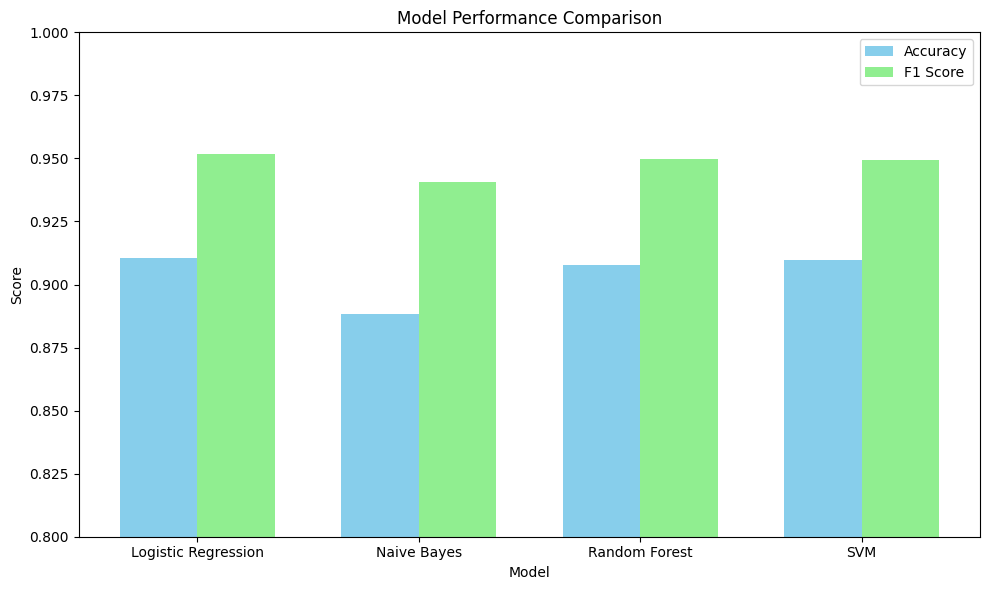

In [57]:
# Create a DataFrame to store model performance metrics
performance_data = {'Model': models.keys(),
                    'Accuracy': [accuracy_score(y_test, model.predict(X_test)) for model in models.values()],
                    'F1 Score': [f1_score(y_test, model.predict(X_test)) for model in models.values()]}
performance_df = pd.DataFrame(performance_data)

# Plot the performance metrics
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(performance_df['Model']))

plt.bar(index, performance_df['Accuracy'], bar_width, label='Accuracy', color='skyblue')
plt.bar(index + bar_width, performance_df['F1 Score'], bar_width, label='F1 Score', color='lightgreen')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(index + bar_width / 2, performance_df['Model'])
plt.legend()
plt.ylim(0.8, 1) # Set y-axis limits for better visualization of differences
plt.tight_layout()
plt.show()

# **5. Model Evaluation and Prediction:**

• Evaluate the best model using:  

o Accuracy Score

o Precision, Recall, F1-Score

o Confusion Matrix

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.48      0.81      0.60       178
           1       0.97      0.89      0.93      1396

    accuracy                           0.88      1574
   macro avg       0.73      0.85      0.77      1574
weighted avg       0.92      0.88      0.89      1574



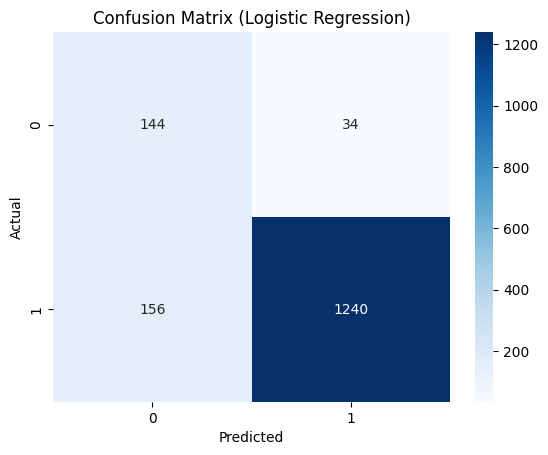

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression # Import LogisticRegression

# Train best model (Logistic Regression in this case)
best_model = LogisticRegression(class_weight='balanced', max_iter=1000) # Use LogisticRegression
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluation
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [60]:
# Compare training and test results
comparison_data = []

for name, model in models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    comparison_data.append([name, train_acc, test_acc, train_f1, test_f1])

comparison_df = pd.DataFrame(comparison_data, columns=['Model', 'Train Accuracy', 'Test Accuracy', 'Train F1 Score', 'Test F1 Score'])
display(comparison_df)

,Model,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score
0,Logistic Regression,0.922307,0.910419,0.957651,0.951630
1,Naive Bayes,0.894344,0.888183,0.943563,0.940701
2,Random Forest,0.987925,0.907878,0.993130,0.949635
3,SVM,0.973149,0.909784,0.984593,0.949430


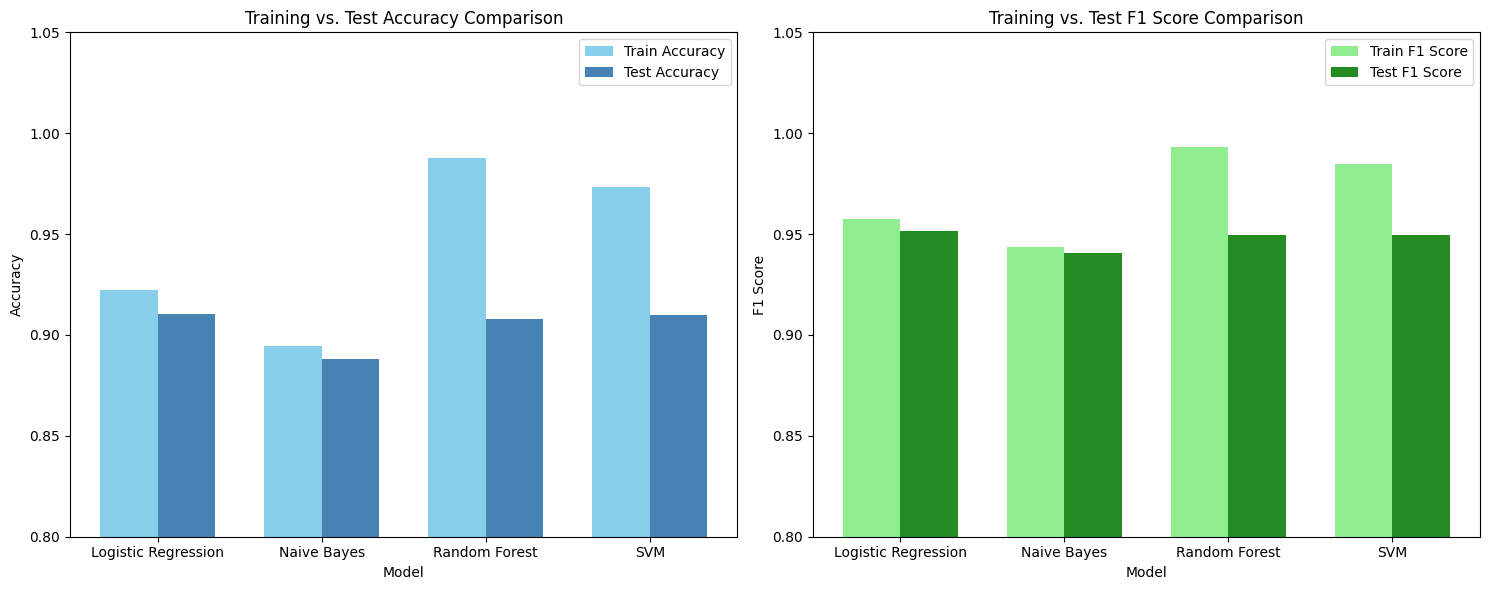

In [61]:
# Plot the comparison of training and test results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

bar_width = 0.35
index = np.arange(len(comparison_df['Model']))

# Plot Accuracy
axes[0].bar(index, comparison_df['Train Accuracy'], bar_width, label='Train Accuracy', color='skyblue')
axes[0].bar(index + bar_width, comparison_df['Test Accuracy'], bar_width, label='Test Accuracy', color='steelblue')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Training vs. Test Accuracy Comparison')
axes[0].set_xticks(index + bar_width / 2)
axes[0].set_xticklabels(comparison_df['Model'])
axes[0].legend()
axes[0].set_ylim(0.8, 1.05)

# Plot F1 Score
axes[1].bar(index, comparison_df['Train F1 Score'], bar_width, label='Train F1 Score', color='lightgreen')
axes[1].bar(index + bar_width, comparison_df['Test F1 Score'], bar_width, label='Test F1 Score', color='forestgreen')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('F1 Score')
axes[1].set_title('Training vs. Test F1 Score Comparison')
axes[1].set_xticks(index + bar_width / 2)
axes[1].set_xticklabels(comparison_df['Model'])
axes[1].legend()
axes[1].set_ylim(0.8, 1.05)

plt.tight_layout()
plt.show()

Test the model on new reviews to classify sentiment as positive or negative.

# **Predict on New Data**

In [63]:
# Predict sentiment of new reviews
new_reviews = ["This phone is amazing!", "Terrible product. Waste of money."]
cleaned = [clean_text(review) for review in new_reviews]
vectorized = tfidf.transform(cleaned).toarray()
predictions = best_model.predict(vectorized)
for review, sentiment in zip(new_reviews, predictions):
    print(f'Review: "{review}" => Sentiment: {"Positive" if sentiment else "Negative"}')


Review: "This phone is amazing!" => Sentiment: Positive
Review: "Terrible product. Waste of money." => Sentiment: Negative


In [73]:
# Predict sentiment of new reviews
new_reviews = ["The product is POOR","Not ABLE sign in on Netflix and many other apps","Absolutely loved it, works perfectly fine!"]
cleaned = [clean_text(review) for review in new_reviews]
vectorized = tfidf.transform(cleaned).toarray()
predictions = best_model.predict(vectorized)
for review, sentiment in zip(new_reviews, predictions):
    print(f'Review: "{review}" => Sentiment: {"Positive" if sentiment else "Negative"}')


Review: "The product is POOR" => Sentiment: Negative
Review: "Not ABLE sign in on Netflix and many other apps" => Sentiment: Negative
Review: "Absolutely loved it, works perfectly fine!" => Sentiment: Positive
